# LBA: Probability and Simulation

## Analysis

Solve the following problems, one of which you will write yourself! Full solutions require clear steps with written justifications as well as an interpretation of the result. There are multiple approaches to solving these problems; you are encouraged to try solving the problems using Python. For example, the scipy.stats library includes useful tools such as a z-score calculator.

### 1) Volleyball

“*There’s only a 35% chance that the team will win the point when they are serving.*” Contrast how Frequentists and Bayesians would interpret this statement (<200 words). [#probability]

Probability is  a chance or likelihood of a proposition is true. Based on frequentist philosophy, the tendency of something happening in a particular time should be equal to the  chance of it happening in long-term. The parameters in computing the probability would stay the same. Therefore, the 35% probability of a team winning when they serve in a particular game should be repeatable for any other game. Hence, the probability of a team winning when they serve in any game would be 35%.

While, in Bayesian theorem is a way to determine what conditional probability should be.  “There’s only a 35% chance that the team will win the point when they are serving.” This statement is a conditional probability; in which according to Bayesian, is not complete yet. In Bayesian, that statement is a probability of the evidence given the hypothesis  P(E I H) . However, in determining Bayesian probability, we need other statements., which are the prior probability of the hypothesis (P(H)), and the probability of the evidence (P(E)). In computing Bayesian probability, the formula would be like this P(E I H) P(H) / P(E). Therefore, based on Bayesian theorem, ’35% chance that the team will win the point when they are serving’ is not a final probability and other conditions should be known to calculate the ‘real’ probability. Different with frequentist, the parameters in computing the probability might change. Using Bayesian theorem, we cannot decide the probability of a team winning when they serve without knowlegde of the changes in parameters.

### 2) Basketball

Tversky and his colleagues studied the records of 48 of the Philadelphia 76ers basketball games in the 1980–81 season to see whether a player had times when he was hot and every shot went in, and other times when he was cold and barely able to hit the backboard. The players estimated that they were about 25 percent more likely to make a shot after a hit than after a miss. In fact, the opposite was true—the 76ers were 6 percent more likely to score after a miss than after a hit. The authors report that the number of hot and cold streaks was about what one would expect by purely random effects. Assuming that a player has a fifty-fifty chance of making a shot and makes 20 shots a game, estimate by simulation (in Python) the proportion of the games in which the player will have a streak of 5 or more hits. Explain the result using a suitable interpretation of probability. [#probability, #simulation]

In [2]:
#A loop for a game
import random
def aGame (): #create a function to find out the score for 20 shots
    score=0 #create an empty score to store the future score
    for i in range (20): #a loop for 20 shots
        x=random.random() #generate random numbers
        if x > 0.5: #if a random number is greater than 0.5 it would be considered as a score
            score=score+1 #the cumulative score
    return score

#A loop for finding the proportion of the games that the player will have 5 or more hits
p=0 #create an empty p for storing the amount of games that the player will have 5 or more hits
for i in range (1000): #a loop of 1000 games
    if (aGame ()) > 5: #if in a game there is 5 hits or more, than a point will be added to p
        p= p + 1; #the cumulative p


print((p/1000)*100, "%")

98.0 %


A player has a 50-50 chance or on the other words, 50% chance of making a shot. In the problem, it also mentions that each player has 20 shots. Using the Python we could make simulation of a player doing 20 shots and compute the possible score with 50% chance of making a hit or score. Then, in finding the proportion that in the games a player will have 5 or more scores, we could make a simulation of 1000 games. In the end, the proportion of the games that the player will have 5 or more hits would be 98%. This proportion might change since we generate random.

### 3) Baseball

A rookie is brought to a baseball club on the assumption that he will have a 0.300 batting average based on his past performance. (Batting average is the ratio of the number of hits to the number of times at bat.) In the first year, he comes to bat 400 times during the season and his batting average is .348. Assume that his at bats can be considered Bernoulli trials with probability 0.3 for success. Give a both qualitative and quantitative argument about what is likely to happen to the player’s batting performance next season. Be sure to discuss the merits of any assumptions that are made. [#distributions]

In [130]:
def num_of_hits(p, n): #function for number of hits
    return p * n #formula for Bernoulli ditribution with p as batting average or probability and n as number of trials

def stand_dev(p): #function for standar deviation
    return (p * (1-p))**.5 #formula for standar deviation in Bernoulli ditribution 

#First year
n = 400 #number of trials
p = 0.348 #probability or batting average in the first year
print("Outcome or final score in the first year:",num_of_hits(0.348, 400)) #probability of success or batting average = 0.348; number of trials = 400
print("Standard deviation in the first year:", stand_dev(0.348)) #standard deviation of number of hits in first year

#Second year
n = 400 #assumed number of trials based on previous year
p = 0.3 #probability or batting average in the second year
print("Expected outcome or score in the second year:", num_of_hits(0.3, 400)) #probability of success or batting average = 0.3; number_of_trials = 400
print("Standard deviation in the second year:",stand_dev(0.3)) #standard deviation of number of hits in second year


Outcome or final score in the first year: 139.2
Standard deviation in the first year: 0.47633601585435464
Expected outcome or score in the second year: 120.0
Standard deviation in the second year: 0.458257569495584


Based on the information given, we could compute that the final score was around 139, with the standard deviation of 0.476. While in the second year, with different predicted batting average, 0.3, we could calculate the expected value or score by multiplying the batting average with assumed number of trials. Having information of number of trials in the previous year, we could use it to calculate the expected value or score in the next year. The result of predicted batting average with the last year trials in 120, with the standard deviation of 0.45. 

### 4) Ski jumping

The distribution of all observed competitive ski jumps in Zakopane, Poland during 2010-2016 is nearly normal with an average jump distance of 120.5 m and a standard deviation of 10 m. [#distributions]

1. What is the probability that the next random jumper will jumper further than 135 m?
2. What is the probability that the mean distance of the next 15 random jumpers is further than 135 m?
3. Could you still estimate the probabilities above if the distribution was actually negatively skewed by the presence of some shorter distance jumps?


Double click to edit this cell to answer question 4). Add a Code cell below if you wish to use Python to do the calculations.

In [47]:
#First problem #Normal distribution
import scipy.stats as st
average_jump = 120.5 #averge jumping distance from 2010-2016; in meters
SD = 10 #standard deviation
x = 135 #the value or distance that we look for; in meters
zScore = (x - average_jump)/SD #Z-score formula
p_values = st.norm.sf(abs(zScore)) #one-sided, since we only look for the distance above 135m
print("Z-score is", zScore)
print("Probability of jumping more than 135 meters is", p_values)

Z-score is 1.45
Probability of jumping more than 135 meters is 0.0735292596096


In [53]:
#Second problem #geometry distribution
P = 0.0735292596096
newP = 0.0735292596096**15
print(newP)

9.928940178328086e-18


#### Third problem

 The new negatively skewed distribution with some shorter jumps would surely change the mean and the standar deviations. However, we could make the ditribution to be a normal-like distribution again with Central Limit Theorem. The way we do it is by creating sampling distribution of samples. The larger the size the sample is, the more the ditribution would appear to be normal. We would use z-score to compute the probability with slightly different formula. Instead of using standard deviation of population, we would use standard error or the standard deviation of sample. Therefore, as we get the normal distribution with Central Limit Theorem, then it is possible to estimate the probabilities on the previous question.

### 5) Construct your own problem.

Write (and solve) a probability problem based on the data collected at the sporting event you attended. The analysis should contain multiple parts, ***enough to demonstrate deep knowledge of all three HC’s: #probability, #distributions, and #simulation.*** It must also involve computations done ***both analytically and via simulation***. Note that the same problem can be approached using multiple techniques. First discuss the context: explain the game you attended and what you measured. Also discuss all assumptions made and any potential flaws in your analysis. The (mostly complete) model problem linked in the assignment instructions is an example of what you could do. Do not copy this example exactly. If you’d like more ideas on what you could calculate, use textbook problems and class activities for inspiration, and brainstorm with your classmates or your professor.

**Notes**:

- The calculation may require some information not obtained in your data collection. You can make additional assumptions as long as the problem still uses your observation in some way.
- Your problem and solution can have multiple parts but should not be much longer than the model problem provided.
- Choose an appropriate level of difficulty. The problem should be solvable by your classmates, and WILL be solved by your classmates in lesson 3.2! So, if your analysis involves a distribution or concept not covered in class, include an APA citation as well as a description of the distribution and its relevance for the problem.
- Don’t forget to include a photo of you at the game!

#### 5.1 Sporting event
#probability, #distributions, and #simulation
I went to Betty Ong Recreation Center to watch a volleyball macth between Minerva Team 1 and Minerva Team 2 on January 24. After a match, the game ended with a final score of 17-21.
Interestingly, some of the players from both team wore long pants and some wear short pants. For every shot, I paid attention to the pants that the player was wearing and recorded whether that player made a score or not.


In [82]:
import csv
 
with open('CS51LBA.csv') as csvDataFile: #import csv file of my data from the game I attended
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        print(row)

['Team', 'Pants', 'Number of misses', 'Number of goals']
['1', 'Long', '5', '5']
['1', 'Long', '4', '2']
['1', 'Long', '7', '1']
['1', 'Short', '4', '4']
['1', 'Short', '2', '4']
['1', 'Short', '6', '1']
['2', 'Long', '3', '5']
['2', 'Long', '4', '6']
['2', 'Long', '7', '3']
['2', 'Long', '3', '0']
['2', 'Short', '1', '5']
['2', 'Short', '4', '2']


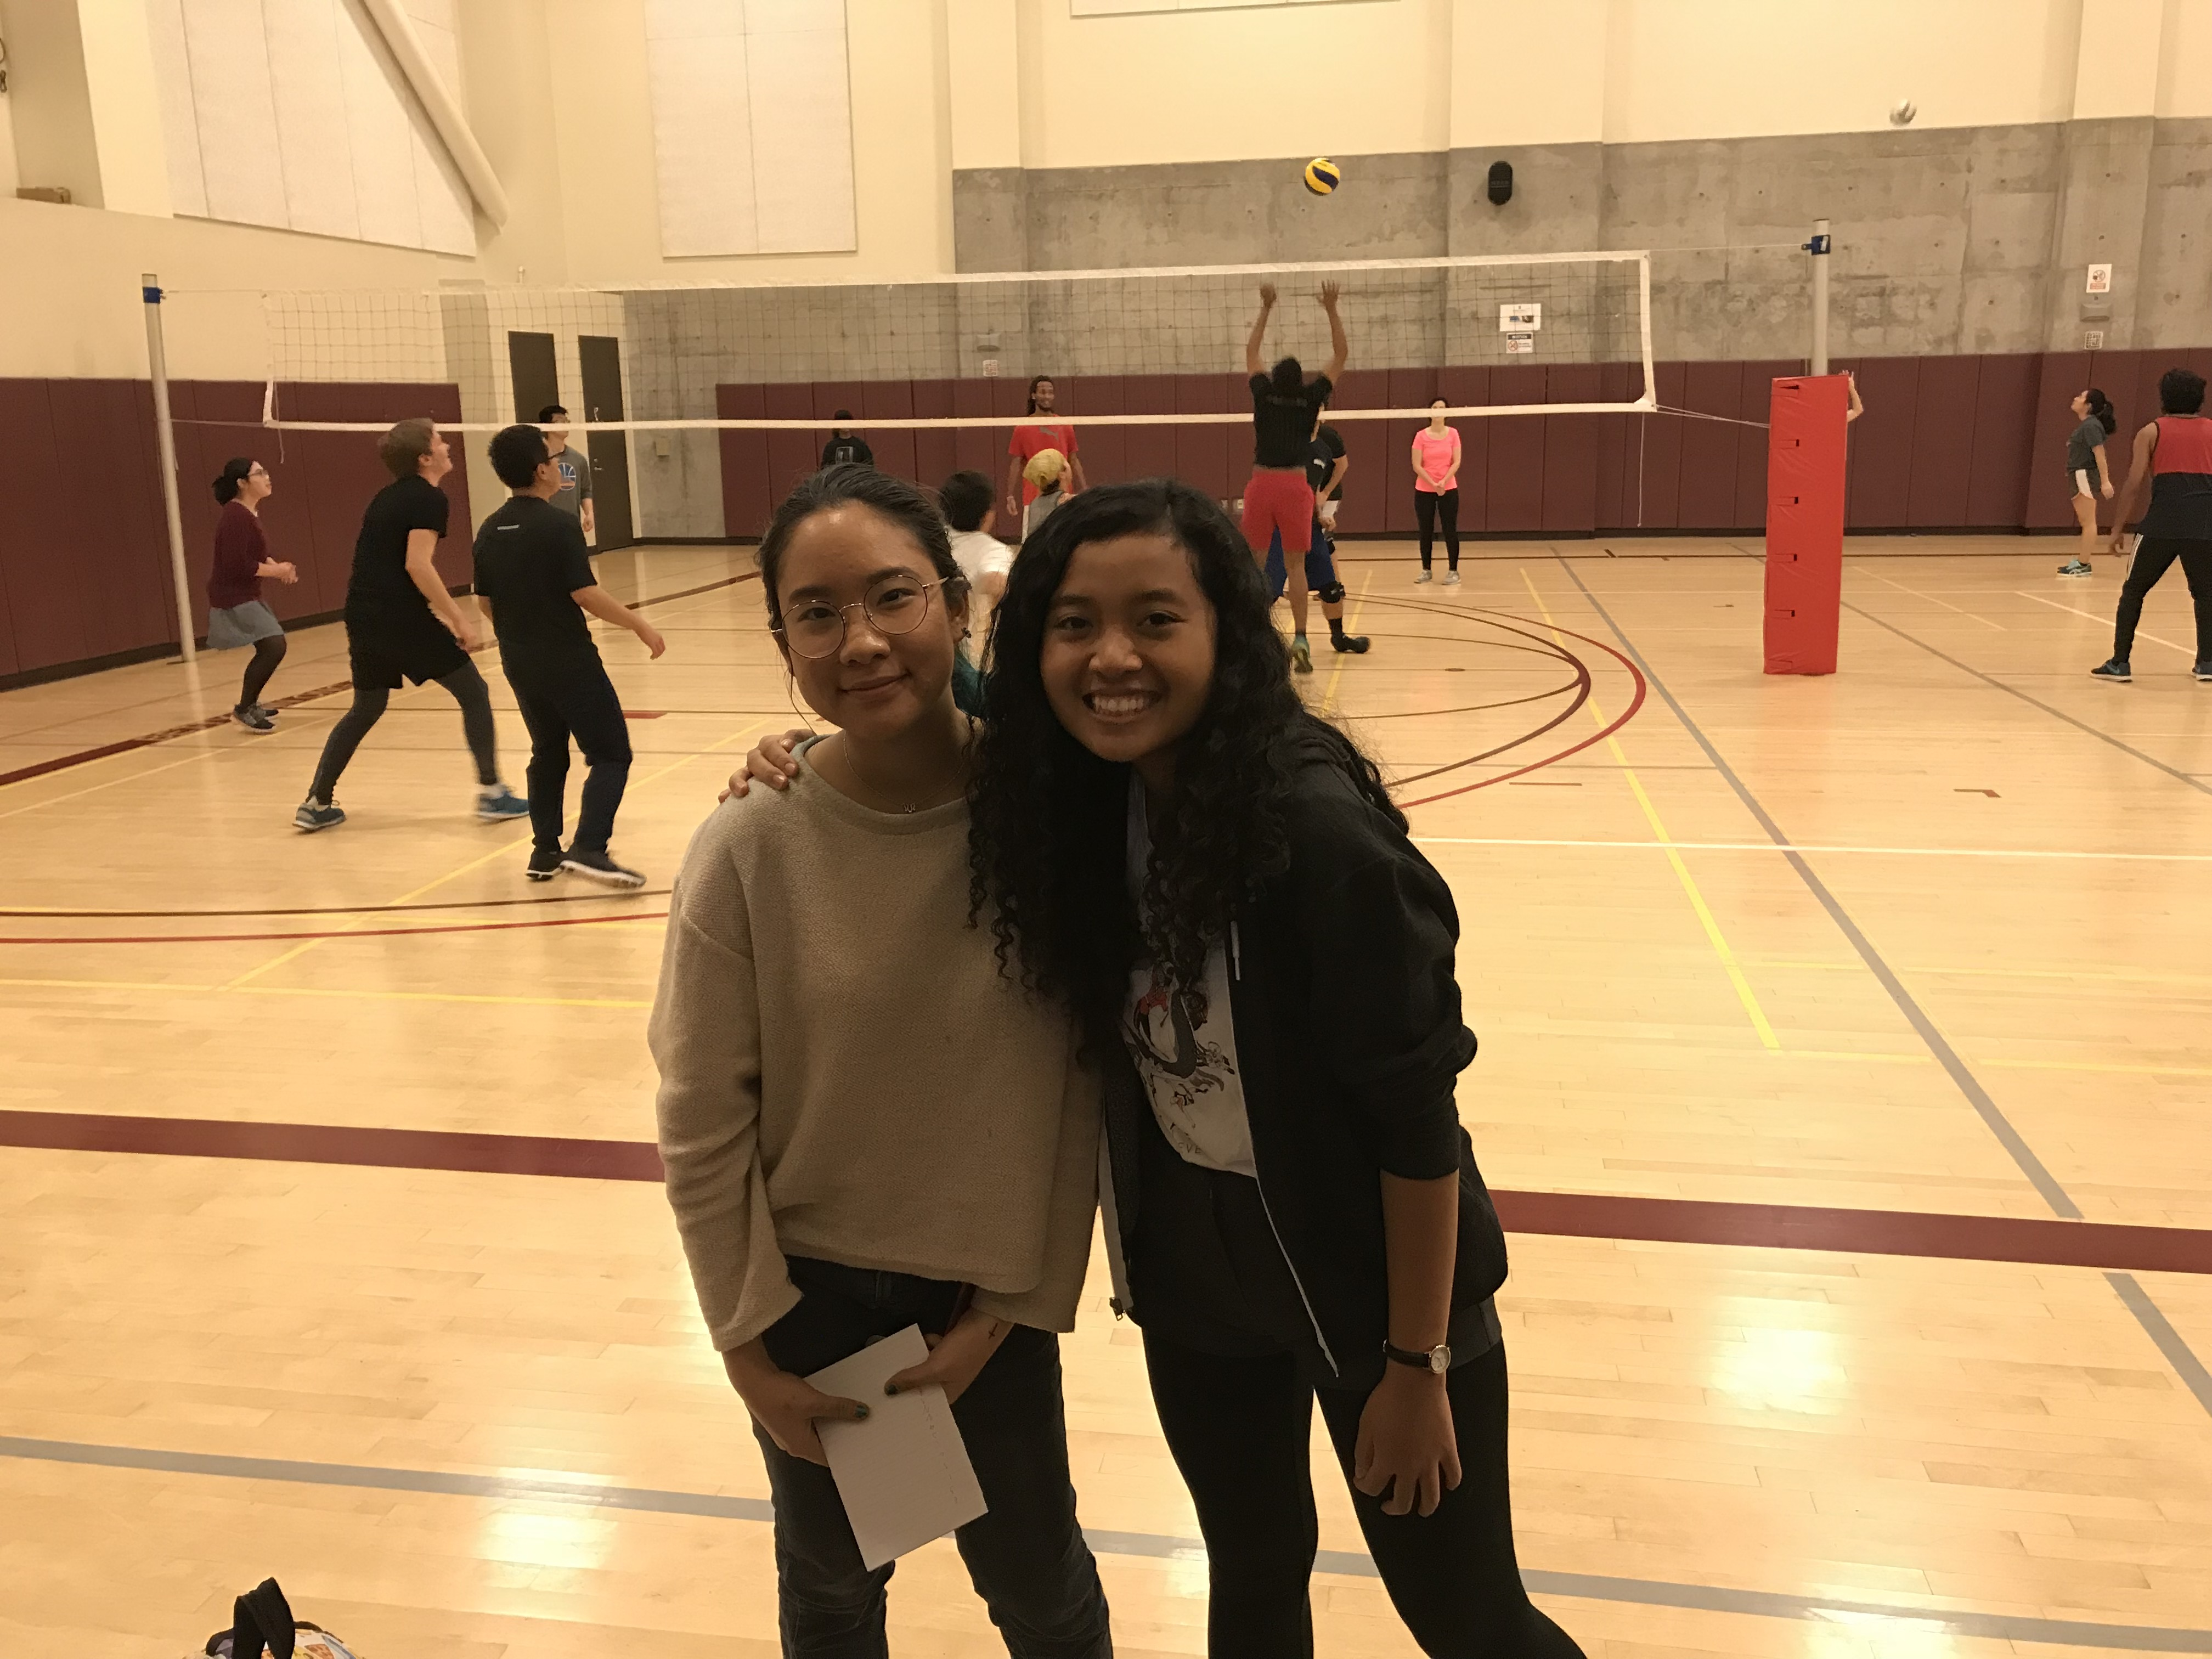

In [134]:
from IPython.display import Image
filename = "LBA.jpg"
Image(filename)

#### 5.2 Problem

I am curious if what we wear during sport would affect us in any ways. I understand that computing and contrasting the probability to make a goal of players with long pants and short pants do not explain the causation. However, I would still want to relate the length of pants with probability.
1. What is the probability of the long pants player 6 times in 8 trials and what is the probbaility of short pants player score 6 times in 8 trials??
2. What is the probability of Minerva Team 2 winning the next game?

##### Assumptions:
In the first question, I would not differenciate between Minerva Team 1 with Minerva Team 2. Rather, I would only see if the player wore long or short pants. Bernoulli trial will be used to model whether every attempt to score (serving, smashing, etc) is a success (scoring a goal) or failure (missing the goal). Every attempt will be considered as independent and not related to other attempt. On the other words, the information about the outcome of one attempt does not influence the probability of other shots. Moreover, every attempt would have the same probability.

My assumption for this game is that the result of all attempts or random trials to score would be the outcome of the game. With the basis of the obsevation on the game, I would also assume that there is a fix number of trials for each team and an each group of player with either short or long pants. Based on team, there would be 88 attempts in total with 45 attempts for team 1 and 43 attempts for team 2. Based on the length of the pants, there would still be 88 attempts in total, with 55 attempts for players with long pants and 33 attempts for player with short pants. Therefore, the probability of scoring for team 1 is p1 = 17/45 = 0.377 and for team 2 is p2 = 21/43 = 0.488. The probability of scoring for players with long pants is pL = 29/55 = 0.527 and for players with short pants is pS = 9/33 = 0.272.

#### 5.2.1 Question 1
##### 1. What is the probability of the long pants player score 6 times in 8 trials and what is the probbaility of short pants player score 6 times in 8 trials?
Binomial distribution would be useful as we have a fixed number of independent and identical Bernoulli trials. It is possible to calculate the probability of exactly k successes (goals) in in independent trials or attempts by using the binomial ditribution formula. The formula is:
$$ P(Goals = k) = (n!/k!(n-k)!)x(p^k(1-p)^{n-k})$$
The challenge is to find the probability that the long pants and short pants player will make 6 goals in 8 attempts. Here are the information that I have:
pL = 0.527;
pS = 0.272;
n = 8;
k = 6.

In [95]:
from scipy import stats
p = 0.527 #pL or probability for long pants players to score
n= 8
k= 6
print("Probability of ",k,"successes in",n,"trials for long pants players:",stats.binom.pmf(k,n,p))

Probability of  6 successes in 8 trials for long pants player: 0.134197369839


In [94]:
p = 0.272 #pS or probability for short pants players to score
n= 8
k= 6
print("Probability of ",k,"successes in",n,"trials for short pants players:",stats.binom.pmf(k,n,p))

Probability of  6 successes in 8 trials for short pants player: 0.00600944291638


There is a 13% chance that the long pants players and 0.6% chance would make 6 successes in 8 trials. Therefore, the long pants players have higher chance to score 6 in 8 attempts than short pants player. However, this does not necessarily prove that wearing long pants would give any affects on playing the game. This only shows that in this particular game, players with long pants happen to have higher probability to score.

#### 5.2.2 Question 2
##### 2. What is the probability of Minerva Team 1 winning the next game?
In the previous game, Team 1 had 45 attempts and Team 2 had 43 attempts. In the next game, I would assume that each team would have the average number of attempts which is (45+43)/2 = 44. Additionally, the probability of scoring for Team 1 is p1 = 17/45 = 0.377 and for Team 2 is p2 = 21/43 = 0.488.


In [ ]:
#Loop for one game
import random
def nextGame(): #the simulation of one game
    score=0
    for i in range (44): #number of attempts
        x=random.random() #simulate random numbers for the outcome
        if x < 0.377: #if the outcome is lower than 0.377, x will be considered and then the score would increase by 1 on the next line
            score=score+1 #the cumulative score
    return score
   
def probability(): #the probability that team 1 would win
    p=0 
    for k in range (1000): #a loop of 1000 games
        if nextGame() >= 21: #if the team get 21 scores or more, the team wins
            p=p+1 #each time the team win, it will be calculated here
    return p
print((probability()/1000)*100, "%")

Based on the simulation above, with the 0.377 probability to win, it is possible to generate a simulation for a game. In order to have a probability for Team 1 to win in the next game, it is necessary to have multiple trials. 

### 6) Reflection

Write a short reflection paragraph (< 200 words) about the insights you gained pertaining to the HCs used in this assignment. Which 1-2 learning principle(s) were the most beneficial for deepening your understanding of the connection between sports, probability, distributions, and simulation? [#scienceoflearning]

In working for this LBA, I learned how useful it is to learn statistics and how to apply it in real life. To be able to calculate probability properly would be helpful in predicting future outcome and minimize risks. Moreover, I also learned how python is helpful in generation simulation which is crucial in creating multiple scenarios, then calculating distribution and probability.
One learning principle that helps me in this assignment is elaborative interrogation. Learning statistics without examples could be hard and challenging. Formulas and theorem might hard to digest without examples. Therefore, using elaborative interrogation, I was able to connect facts and concepts by keep on asking why and how. I believe that next time I see facts, e.g., probability or distribution of something, then I would link it to my understanding for formal class.